[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/Behavior-Cloning-DataSet-Ujjwal/blob/master/Hello,_Colaboratory.ipynb)

In [4]:
import tensorflow as tf
import cv2
import numpy as np
import glob

In [6]:
!wget "https://github.com/jorcus/CarND-Capstone-Dataset/archive/master.zip"
!ls -ltr

--2018-06-05 09:19:07--  https://github.com/jorcus/CarND-Capstone-Dataset/archive/master.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jorcus/CarND-Capstone-Dataset/zip/master [following]
--2018-06-05 09:19:07--  https://codeload.github.com/jorcus/CarND-Capstone-Dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120, 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]   6.17M  39.2MB/s    in 0.2s    

2018-06-05 09:19:07 (39.2 MB/s) - ‘master.zip’ saved [6468705]

total 6328
drwxr-xr-x 1 root root    4096 May 21 17:02 datalab
-rw-r--r-- 1 root root 6468705 Jun  5 

In [10]:
# !unzip 'CarND-Capstone-Dataset-master/dataset.zip'
!ls -ltr
# !rm TrafficLight_Detection-TensorFlowAPI.1


total 6340
drwxr-xr-x 2 root root    4096 Oct  1  2017 CarND-Capstone-Dataset-master
drwxr-xr-x 5 root root    4096 Oct  1  2017 simulator
drwxr-xr-x 6 root root    4096 Oct  1  2017 udacity-sdc
drwxr-xr-x 1 root root    4096 May 21 17:02 datalab
-rw-r--r-- 1 root root 6468705 Jun  5 09:19 master.zip


In [8]:
!ls -ltr
# !unzip 'master.zip'
# !tar -xvzf dataset-sdcnd-capstone.zip


total 6332
drwxr-xr-x 2 root root    4096 Oct  1  2017 CarND-Capstone-Dataset-master
drwxr-xr-x 1 root root    4096 May 21 17:02 datalab
-rw-r--r-- 1 root root 6468705 Jun  5 09:19 master.zip


In [0]:
!ls -lrt


total 6340
drwxr-xr-x 2 root root    4096 Oct  1  2017 CarND-Capstone-Dataset-master
drwxr-xr-x 5 root root    4096 Oct  1  2017 simulator
drwxr-xr-x 6 root root    4096 Oct  1  2017 udacity-sdc
drwxr-xr-x 1 root root    4096 May 21 17:02 datalab
-rw-r--r-- 1 root root 6468705 Jun  4 16:19 master.zip


In [11]:
folders=['green', 'red', 'yellow']
green=[]
red=[]
yellow=[]
x_images=[]
y_labels=[]


for i in range (len(folders)):
  path= glob.glob('udacity-sdc/'+folders[i]+'/*jpg')
  for image_path in path:
#     eval(folders[i]+'.append(cv2.imread(image_path))')
    eval('x_images.append(np.copy(cv2.imread(image_path)))')
    y_labels.append(i)
x_images= np.array(x_images)
y_labels= np.array(y_labels)

print(len(x_images), len(y_labels))    

145 145


In [49]:

def  normalize (x_images):
#     return (x_images-127.5)/127.5
  return x_images/255

# print(type(x_images[0]))
x_images=  normalize(x_images)

In [11]:
sorted_images=[green, red, yellow]
features_green=[]
features_red=[]
features_yellow=[]

features=[features_green,features_red,features_yellow]

for j in range(len(sorted_images)):
  type_of_image=sorted_images[j]
  for i in range(len(type_of_image)):
    image= np.copy(type_of_image[i])
#     print(image.shape)
    features[j].append(np.mean(image))
  print(features[j])  
    

[]
[]
[]


In [51]:

#HYPER parameters tuning
EPOCHS = 50
# BATCH_SIZE = 128
prob=0.5
rate = 0.001
mu = 0
sigma = 0.1
num_of_classes=3
# ((i-k+2p)/s) +1
 

In [52]:
#(256, 85, 3)
def layers(X,keep_prob):
  layer1= tf.layers.conv2d(X,filters=6, kernel_size =(9,4), strides=(1,1), padding='valid', activation=tf.nn.elu)
  #Output shape: 248X82X6
  layer1= tf.nn.dropout(layer1,keep_prob)
  layer1= tf.layers.max_pooling2d(layer1, pool_size=(2,2), strides=(2,2), padding='valid')
  #Output shape: 124X41X6
  

  layer2= tf.layers.conv2d(layer1,filters=16, kernel_size =(9,4), strides=(1,1), padding='valid', activation=tf.nn.elu)
  #Output shape: 116X38X16
  layer2= tf.nn.dropout(layer2,keep_prob)
  layer2= tf.layers.max_pooling2d(layer2, pool_size=(2,2), strides=(2,2), padding='valid')
  #Output shape: 68X19X16  

  layer3= tf.layers.conv2d(layer2, filters=32, kernel_size =(9,4), strides=(1,1), padding='valid', activation=tf.nn.elu)
  #Output shape: 60X16X32
  layer3= tf.nn.dropout(layer3,keep_prob)
  layer3= tf.layers.max_pooling2d(layer3, pool_size=(2,2), strides=(2,2), padding='valid')
  #Output shape: 30X8X32
  
  layer4= tf.layers.conv2d(layer3, filters=48, kernel_size =(9,5), strides=(1,1), padding='valid', activation=tf.nn.elu)
  #Output shape: 22X4X48
  
  layer5= tf.contrib.layers.flatten(layer4)
  #Output shape: 22X4X48= 3264
  
  W6= tf.Variable(tf.truncated_normal(shape=(3264, 1200), mean=mu, stddev=sigma))
  b6= tf.Variable(tf.zeros(1200))
  layer6= tf.add(tf.matmul(layer5, W6),b6)
  layer6= tf.nn.elu(layer6)
  layer6= tf.nn.dropout(layer6, keep_prob)
  
  W7= tf.Variable(tf.truncated_normal(shape=(1200, 3), mean=mu, stddev=sigma))
  b7= tf.Variable(tf.zeros(3))
  layer7= tf.add(tf.matmul(layer6, W7),b7)
  logits= tf.nn.elu(layer7)
  

  return logits
  

In [53]:
x= tf.placeholder(tf.float32,(None, 256, 85, 3), name='x')
y= tf.placeholder(tf.int32, (None), name='y')
keep_prob=tf.placeholder(tf.float32, name='prob')
one_hot= tf.one_hot(y,num_of_classes)

In [54]:
logits_x=layers(x, keep_prob)
cross_entropy= tf.nn.softmax_cross_entropy_with_logits(labels=one_hot, logits=logits_x)
loss_operation=tf.reduce_mean(cross_entropy)
optimizer= tf.train.AdamOptimizer(learning_rate=rate)
training_operation=optimizer.minimize(loss_operation)
saver= tf.train.Saver()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(x_images, y_labels, test_size=0.2)

train_loss=[]
test_loss=[]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(EPOCHS):
    X_train,Y_train= shuffle(X_train, y_train)
    sess.run(training_operation, feed_dict={x:X_train, y:y_train, keep_prob:prob})
    loss_train= sess.run(loss_operation, feed_dict={x:X_train, y:y_train, keep_prob:prob })
    train_loss.append(loss_train)
    
    loss_t= sess.run(loss_operation, feed_dict={x:X_test, y:y_test, keep_prob:prob })
    test_loss.append(loss_t)
    print("Epoch {}, tain loss: {:.3f}, test loss: {:.3f}".format(i+1, loss_train,  loss_t))
    
  saver.save(sess, "./model")
  print("Model saved")

Epoch 1, tain loss: 0.992, test loss: 1.015
Epoch 2, tain loss: 1.352, test loss: 1.701
Epoch 3, tain loss: 0.880, test loss: 0.971
Epoch 4, tain loss: 0.957, test loss: 0.993
Epoch 5, tain loss: 0.950, test loss: 0.988
Epoch 6, tain loss: 0.905, test loss: 0.961
Epoch 7, tain loss: 0.873, test loss: 0.967
Epoch 8, tain loss: 0.904, test loss: 1.036
Epoch 9, tain loss: 0.884, test loss: 1.026
Epoch 10, tain loss: 0.871, test loss: 0.985
Epoch 11, tain loss: 0.886, test loss: 0.964
Epoch 12, tain loss: 0.887, test loss: 0.964
Epoch 13, tain loss: 0.875, test loss: 0.976
Epoch 14, tain loss: 0.875, test loss: 0.985
Epoch 15, tain loss: 0.880, test loss: 1.006
Epoch 16, tain loss: 0.880, test loss: 1.022
Epoch 17, tain loss: 0.876, test loss: 0.987
Epoch 18, tain loss: 0.873, test loss: 0.975
Epoch 19, tain loss: 0.877, test loss: 0.974
Epoch 20, tain loss: 0.874, test loss: 0.965
Epoch 21, tain loss: 0.869, test loss: 0.961
Epoch 22, tain loss: 0.870, test loss: 0.973
Epoch 23, tain loss

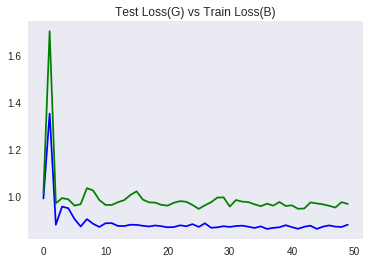

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(train_loss ,'b')
plt.plot(test_loss,'g')
plt.title("Test Loss(G) vs Train Loss(B)")
plt.grid()
plt.show()

INFO:tensorflow:Restoring parameters from ./model
[[[-1.36870434e-03 -9.68858131e-04 -1.64552095e-03]
  [-1.21491734e-03 -6.92041522e-04 -1.03037293e-03]
  [-7.53556324e-04  1.53787005e-05  3.22952710e-04]
  ...
  [-1.49173395e-03 -1.86082276e-03 -2.16839677e-03]
  [-1.49173395e-03 -1.86082276e-03 -2.16839677e-03]
  [-1.46097655e-03 -1.83006536e-03 -2.13763937e-03]]

 [[-1.30718954e-03 -9.68858131e-04 -1.58400615e-03]
  [-1.18415994e-03 -6.92041522e-04 -1.03037293e-03]
  [-7.22798923e-04 -4.61361015e-05  2.92195309e-04]
  ...
  [-1.49173395e-03 -1.86082276e-03 -2.16839677e-03]
  [-1.49173395e-03 -1.86082276e-03 -2.16839677e-03]
  [-1.46097655e-03 -1.83006536e-03 -2.13763937e-03]]

 [[-1.33794694e-03 -1.12264514e-03 -1.58400615e-03]
  [-1.21491734e-03 -8.45828527e-04 -1.03037293e-03]
  [-7.84313725e-04 -1.69165705e-04  1.69165705e-04]
  ...
  [-1.49173395e-03 -1.86082276e-03 -2.16839677e-03]
  [-1.46097655e-03 -1.83006536e-03 -2.13763937e-03]
  [-1.39946175e-03 -1.86082276e-03 -2.137639

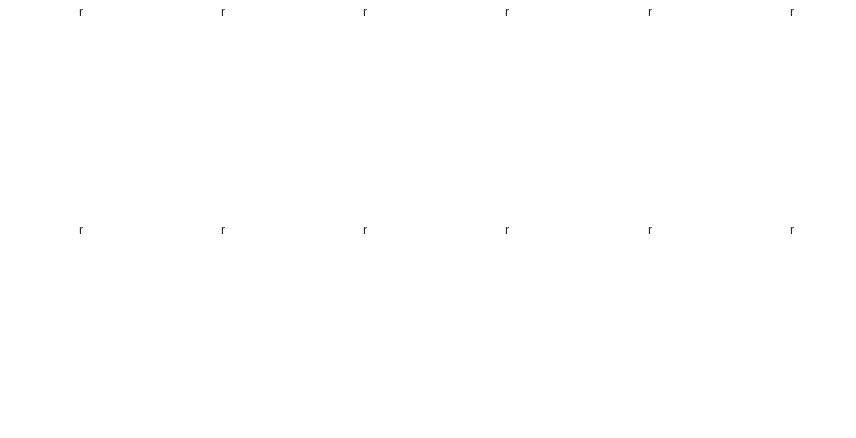

In [60]:
softmax_logits= tf.nn.softmax(logits_x)
top_k= tf.nn.top_k(softmax_logits, 3)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  saver.restore(sess, './model')
  test_softmax_logits= sess.run(softmax_logits, feed_dict={x:x_images, keep_prob: 1})
  test_top_k= sess.run(top_k, feed_dict={x:x_images, keep_prob: 1})

labels = []
images= []
for i in range(len(X_test)):
  images.append(x_images[i].squeeze())
  labels.append(folders[np.argmax(test_softmax_logits[i])][1])
  
plt.figure(figsize=(12,12))

for i in range(12):
    plt.subplot(4, 6, i+1)
    plt.axis('off')
    plt.tight_layout()
    plt.title(labels[i])
#     plt.imshow(images[i])
    print(images[i])
plt.show()